<a href="https://colab.research.google.com/github/roshansadath/COMP6721_Winter2023_GroupN/blob/main/Harvard%20Chest%20XRay/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
data_path = "/content/drive/MyDrive/Harvard_Chest_XRay/"
#data_path = "/content/drive/My Drive/NIH_Chest_XRay/"
#data_path = "/content/drive/My Drive/Harvard_Chest_XRay/"

sample_ratio = 0.4
batch_size = 96
num_epochs = 20

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio, batch_size)

**MODEL TRAINING**

In [ ]:
# Define the AlexNet model and set Pretraining to False to train model from scratch
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
model.classifier[6] = nn.Linear(4096, len(dataset.classes))
model.to(device)
 
# Define loss function as CrossEntropy and optimizer as Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.0001) 
losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "AlexNet", num_epochs)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Epoch 1/20: 100%|██████████| 96/96 [15:07<00:00,  9.46s/batch, Accuracy=0.432, Loss=1.35, Precision=0.36, Recall=0.324, F1 Score=0.28]


VALIDATION: Accuracy: 0.4832 | Loss: 1.2322 | Recall: 0.3931 | Precision: 0.4815 | F-score: 0.3737



Epoch 2/20: 100%|██████████| 96/96 [00:32<00:00,  2.97batch/s, Accuracy=0.567, Loss=1.07, Precision=0.485, Recall=0.403, F1 Score=0.387]


VALIDATION: Accuracy: 0.5612 | Loss: 1.0775 | Recall: 0.4819 | Precision: 0.5957 | F-score: 0.4525



Epoch 3/20: 100%|██████████| 96/96 [00:34<00:00,  2.78batch/s, Accuracy=0.632, Loss=0.943, Precision=0.54, Recall=0.46, F1 Score=0.462]


VALIDATION: Accuracy: 0.6460 | Loss: 0.8888 | Recall: 0.6106 | Precision: 0.6333 | F-score: 0.6108



Epoch 4/20: 100%|██████████| 96/96 [00:35<00:00,  2.69batch/s, Accuracy=0.668, Loss=0.859, Precision=0.571, Recall=0.501, F1 Score=0.509]


VALIDATION: Accuracy: 0.6667 | Loss: 0.8374 | Recall: 0.6130 | Precision: 0.6937 | F-score: 0.6223



Epoch 5/20: 100%|██████████| 96/96 [00:37<00:00,  2.55batch/s, Accuracy=0.726, Loss=0.722, Precision=0.604, Recall=0.539, F1 Score=0.552]


VALIDATION: Accuracy: 0.6896 | Loss: 0.7887 | Recall: 0.6426 | Precision: 0.7135 | F-score: 0.6556



Epoch 6/20: 100%|██████████| 96/96 [00:39<00:00,  2.40batch/s, Accuracy=0.779, Loss=0.597, Precision=0.634, Recall=0.575, F1 Score=0.59]


VALIDATION: Accuracy: 0.7867 | Loss: 0.5974 | Recall: 0.7747 | Precision: 0.7751 | F-score: 0.7718



Epoch 7/20: 100%|██████████| 96/96 [00:42<00:00,  2.25batch/s, Accuracy=0.817, Loss=0.502, Precision=0.662, Recall=0.607, F1 Score=0.622]


VALIDATION: Accuracy: 0.7905 | Loss: 0.5749 | Recall: 0.7652 | Precision: 0.8008 | F-score: 0.7687



Epoch 8/20: 100%|██████████| 96/96 [00:45<00:00,  2.13batch/s, Accuracy=0.831, Loss=0.459, Precision=0.684, Recall=0.632, F1 Score=0.648]


VALIDATION: Accuracy: 0.8157 | Loss: 0.5062 | Recall: 0.7891 | Precision: 0.8209 | F-score: 0.7993



Epoch 9/20: 100%|██████████| 96/96 [00:48<00:00,  1.98batch/s, Accuracy=0.858, Loss=0.383, Precision=0.704, Recall=0.656, F1 Score=0.671]


VALIDATION: Accuracy: 0.8211 | Loss: 0.5453 | Recall: 0.7861 | Precision: 0.8349 | F-score: 0.8024



Epoch 10/20: 100%|██████████| 96/96 [00:48<00:00,  1.96batch/s, Accuracy=0.865, Loss=0.368, Precision=0.721, Recall=0.675, F1 Score=0.691]


VALIDATION: Accuracy: 0.8356 | Loss: 0.4553 | Recall: 0.8223 | Precision: 0.8417 | F-score: 0.8290



Epoch 11/20: 100%|██████████| 96/96 [00:51<00:00,  1.86batch/s, Accuracy=0.881, Loss=0.327, Precision=0.736, Recall=0.693, F1 Score=0.708]


VALIDATION: Accuracy: 0.8142 | Loss: 0.5386 | Recall: 0.8049 | Precision: 0.8206 | F-score: 0.8024



Epoch 12/20: 100%|██████████| 96/96 [00:54<00:00,  1.76batch/s, Accuracy=0.887, Loss=0.308, Precision=0.749, Recall=0.708, F1 Score=0.723]


VALIDATION: Accuracy: 0.8593 | Loss: 0.3973 | Recall: 0.8515 | Precision: 0.8608 | F-score: 0.8533



Epoch 13/20: 100%|██████████| 96/96 [00:56<00:00,  1.71batch/s, Accuracy=0.903, Loss=0.274, Precision=0.762, Recall=0.722, F1 Score=0.737]


VALIDATION: Accuracy: 0.8601 | Loss: 0.4104 | Recall: 0.8464 | Precision: 0.8585 | F-score: 0.8515



Epoch 14/20: 100%|██████████| 96/96 [00:59<00:00,  1.62batch/s, Accuracy=0.91, Loss=0.252, Precision=0.773, Recall=0.735, F1 Score=0.75]


VALIDATION: Accuracy: 0.8555 | Loss: 0.4000 | Recall: 0.8390 | Precision: 0.8557 | F-score: 0.8452



Epoch 15/20: 100%|██████████| 96/96 [01:01<00:00,  1.56batch/s, Accuracy=0.918, Loss=0.228, Precision=0.783, Recall=0.747, F1 Score=0.761]


VALIDATION: Accuracy: 0.8670 | Loss: 0.3775 | Recall: 0.8575 | Precision: 0.8632 | F-score: 0.8599



Epoch 16/20: 100%|██████████| 96/96 [01:05<00:00,  1.48batch/s, Accuracy=0.921, Loss=0.221, Precision=0.792, Recall=0.758, F1 Score=0.771]


VALIDATION: Accuracy: 0.8540 | Loss: 0.4000 | Recall: 0.8342 | Precision: 0.8618 | F-score: 0.8439



Epoch 17/20: 100%|██████████| 96/96 [01:08<00:00,  1.41batch/s, Accuracy=0.934, Loss=0.186, Precision=0.801, Recall=0.768, F1 Score=0.781]


VALIDATION: Accuracy: 0.8570 | Loss: 0.3953 | Recall: 0.8483 | Precision: 0.8524 | F-score: 0.8481



Epoch 18/20: 100%|██████████| 96/96 [01:08<00:00,  1.39batch/s, Accuracy=0.941, Loss=0.162, Precision=0.809, Recall=0.777, F1 Score=0.79]


VALIDATION: Accuracy: 0.8570 | Loss: 0.4145 | Recall: 0.8483 | Precision: 0.8530 | F-score: 0.8504



Epoch 19/20: 100%|██████████| 96/96 [01:11<00:00,  1.34batch/s, Accuracy=0.938, Loss=0.17, Precision=0.817, Recall=0.785, F1 Score=0.798]


VALIDATION: Accuracy: 0.8593 | Loss: 0.4218 | Recall: 0.8419 | Precision: 0.8625 | F-score: 0.8483



Epoch 20/20: 100%|██████████| 96/96 [01:14<00:00,  1.29batch/s, Accuracy=0.946, Loss=0.148, Precision=0.823, Recall=0.793, F1 Score=0.806]


VALIDATION: Accuracy: 0.8739 | Loss: 0.3990 | Recall: 0.8591 | Precision: 0.8739 | F-score: 0.8655

[1.3504977757494876, 1.0693426948989653, 0.9429178189910861, 0.8592497542599826, 0.7215629247430504, 0.5966812389663706, 0.5022548940804158, 0.4591919213009068, 0.3832902121857833, 0.3679681052869558, 0.3271360801108065, 0.3078909678226507, 0.2735139558959067, 0.25229965956885103, 0.22773221122438225, 0.22091258863466917, 0.1862421551632394, 0.16229854019831183, 0.16956354373987223, 0.1484614807997176] [1.2322232285770802, 1.0774520586390015, 0.8888003426954287, 0.8374170218038997, 0.7886548293839901, 0.5974394577905673, 0.5748963126348793, 0.5061583863485843, 0.5452763011696142, 0.4552672097989179, 0.5385746018055382, 0.3972976959626609, 0.41043841100614004, 0.40001051633729845, 0.3775352794642842, 0.3999537087361747, 0.39533915377538137, 0.4144861495822941, 0.4217953933488338, 0.399029529422795]


In [ ]:
torch.save(model.state_dict(), "{}alexnet.pth".format(data_path))

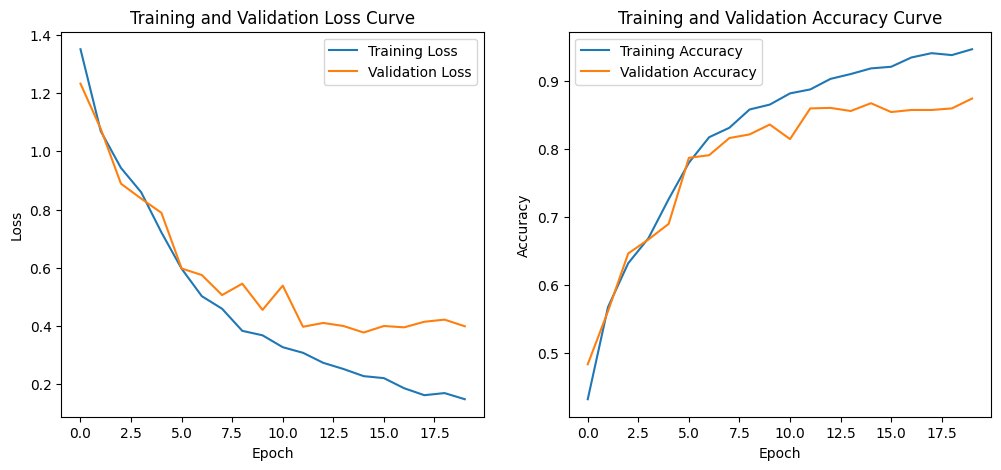

In [ ]:
#Plotting the Loss and Accuracy Curves
plot_model_curves(losses, accuracies, v_accuracies, v_losses)

TEST: Accuracy: 0.8745 | Loss: 0.4072 | Recall: 0.8628 | Precision: 0.8756 | F-score: 0.8685



<Figure size 800x800 with 0 Axes>

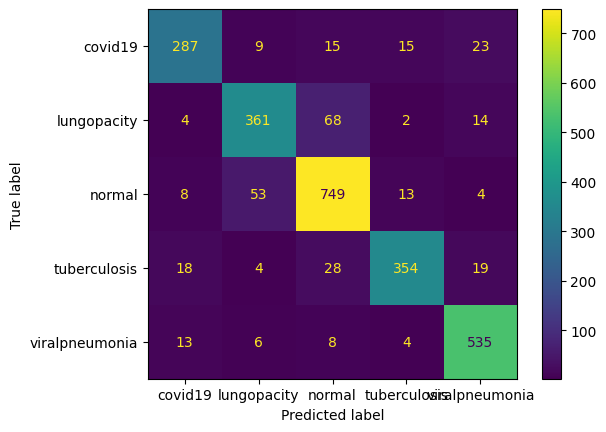

In [ ]:
#Evaluate Model on Test Set
evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "AlexNet")

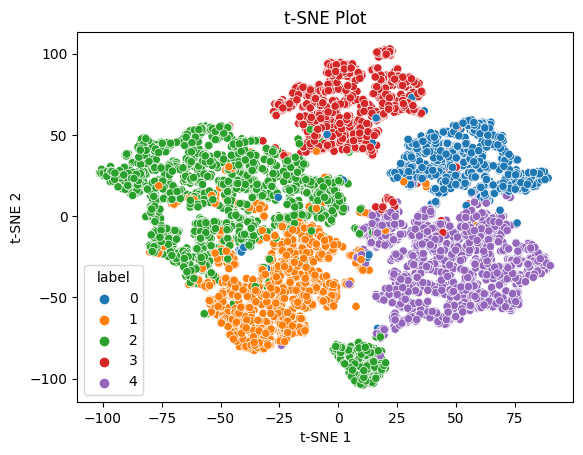

In [ ]:
#Obtain TSNE Plot
plot_TSNE(train_loader, device, model)

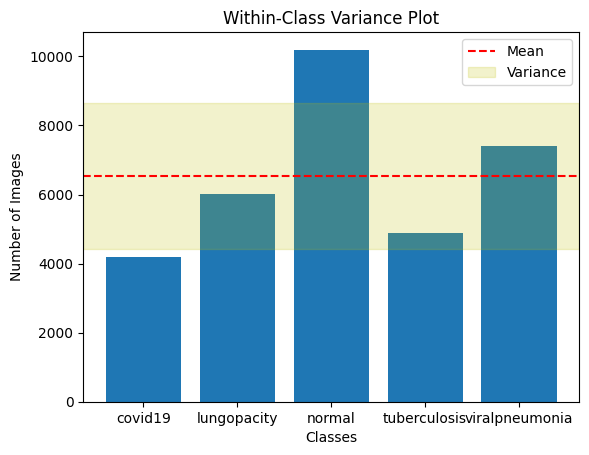

In [ ]:
#Plot the Within Class Variance of the Dataset for the Model
plot_within_class_variance(dataset)